# <font color='navy'> <b> Harmonický oscilátor </b> </font>


[Harmonický oscilátor](https://en.wikipedia.org/wiki/Harmonic_oscillator) 
je popísaný diferenciálnou rovnicou druhého rádu, ktorá má tvar

\begin{equation*}
 \frac{\mathrm{d}^2 s}{\mathrm{d}t^2} + \omega^2 \, s = 0
\end{equation*} 

S použitím substitúcií 

\begin{equation*}
y_1 = s
\end{equation*}

\begin{equation*}
\frac{\mathrm{d} y_2}{\mathrm{d}t} = \omega \, y_1
\end{equation*} 

rovnicu upravíme 

\begin{equation*}
\frac{\mathrm{d} }{\mathrm{d}t} \frac{\mathrm{d} y_1}{\mathrm{d}t} = -\omega^2 \, y_1 \,\, \Rightarrow \,\,
\frac{\mathrm{d} }{\mathrm{d}t} \frac{\mathrm{d} y_1}{\mathrm{d}t} = -\omega \frac{\mathrm{d} }{\mathrm{d}t} y_2
\end{equation*} 

a získame sústavu dvoch diferenciálnych rovníc prvého rádu

\begin{equation*}
\frac{\mathrm{d} y_2}{\mathrm{d}t} = \omega \, y_1 
\end{equation*}

\begin{equation*}
\frac{\mathrm{d} y_1}{\mathrm{d}t} = -\omega \, y_2  
\end{equation*}

v integrálnom tvare

\begin{equation*}
  y_2(t) = \omega \int y_1(t) dt  
\end{equation*}

\begin{equation*}
  y_1(t) = -\omega \int y_2(t) dt  
\end{equation*}

## <font color='purple'><b> KiCad-XSPICE </b>Simulácia sústavy diferenciálnych rovníc  </font>

Sústavu integrálnych rovníc vieme priamo zobraziť pomocou blokov v simulačnom diagrame s využitím funkčných blokov z rozšírenia XSPICE, ktoré je súčasťou simulátora *ngspice*.
V grafickom editore s blokmi pracujeme ako so štandardnými elektronickými komponentami a môžeme ich s nimi aj volne kombinovať.

V blokovom zapojení zdroj napätia určuje generovanú frekvenciu, počiatočná podmienka intergrátora U3 určuje amplitúdu kmitov. 

<img src="./examples/0110_oscilator/0110_oscilator.png" width="500">

<img src="./examples/0110_oscilator/simulacia.png" width="600">

## <font color='purple'> <b> Python-Numpy </b> Numerické riešenie diferenciálnych rovníc oscilátora  </font>

Numerické riešenie rovníc harmonického oscilátora získame pomocou metódy *odeint* pre riešenie sústavy diferenciálnych rovníc z balíka scipy.

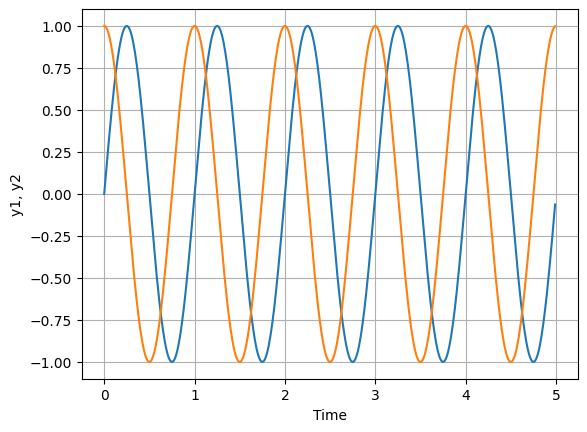

In [1]:
%reset -sf 
%matplotlib inline

from numpy import *
import pylab as plt
from scipy.integrate import odeint

y0=[0.0, 1.0]                    # pociatocne podmienky
omega = 2*pi                     # frekvencia oscilatora 1Hz

def func(y, t):                  # vypocet vektora derivacii
    return [y[1]*omega, y[0]*(-omega)]

time=arange(0.0, 5.0, 0.01)     # cas
y = odeint(func, y0, time )      # vektor riesenia ODE

plt.plot(time, y)
plt.ylabel('y1, y2')
plt.xlabel('Time')
plt.grid()
plt.show()

## <font color='purple'><b> Python-Jupyter </b>  Parametrická simulácia </font>

Pre parametrickú simuláciu upravíme zapojenie zmenou hodnoty zdroja **V1** na parameter *{omega}* reprezentujúcim uhlovú frekvenciu oscilátora. Parametrom $\omega$ nastavujeme frekvenciu oscilátora, pre hodnotu $\omega = 2 \pi$ bude frekvencia oscilátora 1Hz.

<img src="./examples/0110_oscilator/0110_oscilator_par.png" width="500">

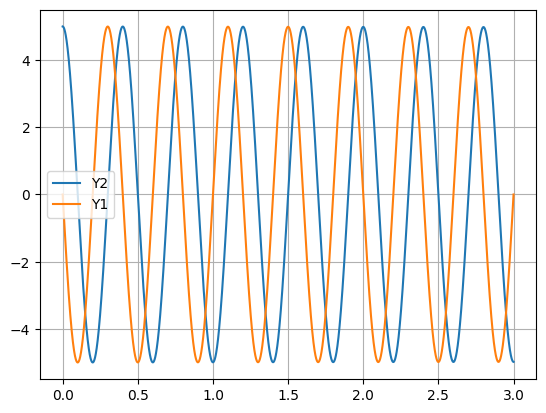

In [5]:
%reset -sf 
%matplotlib inline
import pylab as plt
import sys
sys.path.append('./py')
from ksim import *

g = kSim('./examples/0110_oscilator/0110_oscilator.cir')
g.setTRAN(1e-5, 3, uic='UIC' )
g.setPAR('omega', 5*pi)
g.sim()

plt.plot(g.xData, g.yData['v(y2)'], label=str('Y2')) 
plt.plot(g.xData, g.yData['v(y1)'], label=str('Y1'))
plt.legend()
plt.grid()
plt.show()

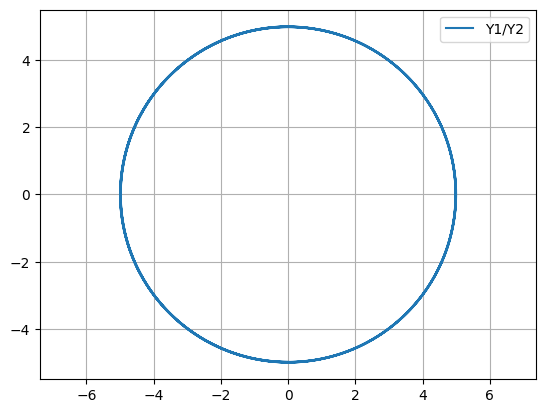

In [7]:
plt.plot(g.yData['v(y1)'], g.yData['v(y2)'], label=str('Y1/Y2')) 
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()